<a href="https://colab.research.google.com/github/AdamJelley/AdventOfCode2021/blob/main/Day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 13

In [146]:
import requests
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Variables to set
day = 13
cookie = ''

In [3]:
input_link = f'https://adventofcode.com/2021/day/{day}/input'
user_cookie = {'session':cookie} # Retrieve session cookie corresponding to user login (by inspecting cookies on data page)

In [19]:
raw_input = requests.get(input_link, cookies=user_cookie).text[:-1]
[raw_coordinates, raw_instructions] = raw_input.split('\n\n')
coordinates = [[int(x) for x in coordinate.split(',')] for coordinate in raw_coordinates.split('\n')]
instructions = [[instruction.split('=')[0][-1], int(instruction.split('=')[1])] for instruction in raw_instructions.split('\n')]

In [131]:
x_max = max([coordinate[0] for coordinate in coordinates])
y_max = max([coordinate[1] for coordinate in coordinates])
print(x_max, y_max)

paper_height = instructions[0][1]*2
paper_width = instructions[1][1]*2
print(paper_height, paper_width)

1307 894
1310 894


Paper must be shaped (1310, 894) to be folded exactly in half by first two folds.

In [132]:
paper = np.zeros((paper_height+1, paper_width+1))
for coordinate in coordinates:
  paper[tuple(coordinate)]=1

assert paper.sum()==len(coordinates) # Coordinates are unique

## Part 1

In [139]:
def fold(paper, instruction):
  if instruction[0] == 'x':
    assert paper[instruction[1],:].sum()==0 # No dots on fold
    assert paper.shape[0]==2*instruction[1]+1 # Folding paper in half
    top_part = paper[:instruction[1],:]
    bottom_part = paper[instruction[1]+1:,:]
    bottom_part_folded = bottom_part[::-1,:]
    new_paper = np.maximum(top_part, bottom_part_folded)

  elif instruction[0] == 'y':
    assert paper[:,instruction[1]].sum()==0 # No dots on fold
    assert paper.shape[1]==2*instruction[1]+1 # Folding paper in half
    left_part = paper[:,:instruction[1]]
    right_part = paper[:,instruction[1]+1:]
    left_part_folded = left_part[:,::-1]
    new_paper = np.maximum(right_part, left_part_folded)

  else:
    raise TypeError(f"Fold dimension {instruction[0]} unknown.")

  return new_paper

In [140]:
new_paper = fold(paper, instructions[0])

print(f'Number of dots visible after first fold: {int(new_paper.sum())}')

Number of dots visible after first fold: 847


## Part 2

In [152]:
# Perform folds
current_paper = paper.copy()
for instruction in instructions:
  current_paper = fold(current_paper, instruction)

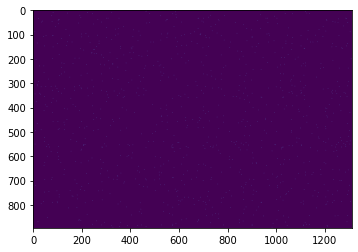

In [153]:
# Display initial paper as image
plt.imshow(paper.T[::-1,:])

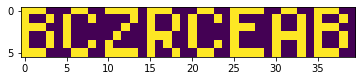

In [156]:
# Display final paper as image after all folds
plt.imshow(current_paper.T[::-1,:])